In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [2]:
df = pd.read_csv("/content/penyebab_kematian_jabar.csv")
df.head()

,id,kode_provinsi,nama_provinsi,kode_kabupaten_kota,nama_kabupaten_kota,jenis_kematian,penyebab_kematian,jumlah_kematian,satuan,tahun
0,1,32,JAWA BARAT,3201,KABUPATEN BOGOR,KEMATIAN BALITA,CAMPAK,0,JIWA,2017
1,2,32,JAWA BARAT,3201,KABUPATEN BOGOR,KEMATIAN BALITA,DEMAM,0,JIWA,2017
2,3,32,JAWA BARAT,3201,KABUPATEN BOGOR,KEMATIAN BALITA,DIARE,0,JIWA,2017
3,4,32,JAWA BARAT,3201,KABUPATEN BOGOR,KEMATIAN BALITA,DIFTERI,0,JIWA,2017
4,5,32,JAWA BARAT,3201,KABUPATEN BOGOR,KEMATIAN BALITA,LAIN-LAIN,7,JIWA,2017


In [4]:
tahun = 2017
jenis_kematian = "KEMATIAN BALITA"


filtered = df[(df['tahun'] == tahun) & (df['jenis_kematian'] == jenis_kematian)]
filtered.head()

,id,kode_provinsi,nama_provinsi,kode_kabupaten_kota,nama_kabupaten_kota,jenis_kematian,penyebab_kematian,jumlah_kematian,satuan,tahun
0,1,32,JAWA BARAT,3201,KABUPATEN BOGOR,KEMATIAN BALITA,CAMPAK,0,JIWA,2017
1,2,32,JAWA BARAT,3201,KABUPATEN BOGOR,KEMATIAN BALITA,DEMAM,0,JIWA,2017
2,3,32,JAWA BARAT,3201,KABUPATEN BOGOR,KEMATIAN BALITA,DIARE,0,JIWA,2017
3,4,32,JAWA BARAT,3201,KABUPATEN BOGOR,KEMATIAN BALITA,DIFTERI,0,JIWA,2017
4,5,32,JAWA BARAT,3201,KABUPATEN BOGOR,KEMATIAN BALITA,LAIN-LAIN,7,JIWA,2017


In [5]:
df_group = (
filtered.groupby(['penyebab_kematian', 'nama_kabupaten_kota'])['jumlah_kematian']
.sum()
.reset_index()
)


pivot = df_group.pivot(
index='penyebab_kematian',
columns='nama_kabupaten_kota',
values='jumlah_kematian'
).fillna(0)


scaler = StandardScaler()
X = scaler.fit_transform(pivot)


pivot.head()

nama_kabupaten_kota,KABUPATEN BANDUNG,KABUPATEN BANDUNG BARAT,KABUPATEN BEKASI,KABUPATEN BOGOR,KABUPATEN CIAMIS,KABUPATEN CIANJUR,KABUPATEN CIREBON,KABUPATEN GARUT,KABUPATEN INDRAMAYU,KABUPATEN KARAWANG,...,KABUPATEN TASIKMALAYA,KOTA BANDUNG,KOTA BANJAR,KOTA BEKASI,KOTA BOGOR,KOTA CIMAHI,KOTA CIREBON,KOTA DEPOK,KOTA SUKABUMI,KOTA TASIKMALAYA
penyebab_kematian,,,,,,,,,,,,,,,,,,,,,
CAMPAK,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
DEMAM,0,0,0,0,0,0,0,0,0,1,...,1,0,1,0,0,0,1,0,2,0
DIARE,0,0,0,0,0,0,2,2,1,0,...,0,1,2,0,3,1,0,1,0,0
DIFTERI,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
LAIN-LAIN,5,1,1,7,13,2,24,7,3,5,...,21,12,8,5,9,0,2,7,4,3


In [7]:
scores = {}
for k in range(2, 7):
  kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
  labels = kmeans.fit_predict(X)
  score = silhouette_score(X, labels)
  scores[k] = score


scores

{2: np.float64(0.6701741121301243),
 3: np.float64(0.36410659217075125),
 4: np.float64(0.3534587856202954),
 5: np.float64(0.30324143032506995),
 6: np.float64(0.2857142857142857)}

In [8]:
silhouette_df = pd.DataFrame.from_dict(
scores, orient='index', columns=['Silhouette Score']
)


silhouette_df

,Silhouette Score
2,0.670174
3,0.364107
4,0.353459
5,0.303241
6,0.285714


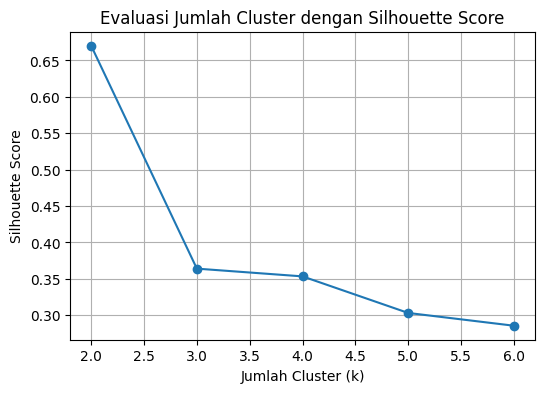

In [9]:
plt.figure(figsize=(6,4))
plt.plot(scores.keys(), scores.values(), marker='o')
plt.xlabel("Jumlah Cluster (k)")
plt.ylabel("Silhouette Score")
plt.title("Evaluasi Jumlah Cluster dengan Silhouette Score")
plt.grid(True)
plt.show()